In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
from sklearn.metrics import accuracy_score
data=pd.read_csv('income_2.csv')
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()

In [18]:
data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [19]:
data.shape

(48842, 7)

In [17]:
data.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')

In [21]:
XX=sc.fit_transform(data[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week']])

In [22]:
XX.shape

(48842, 6)

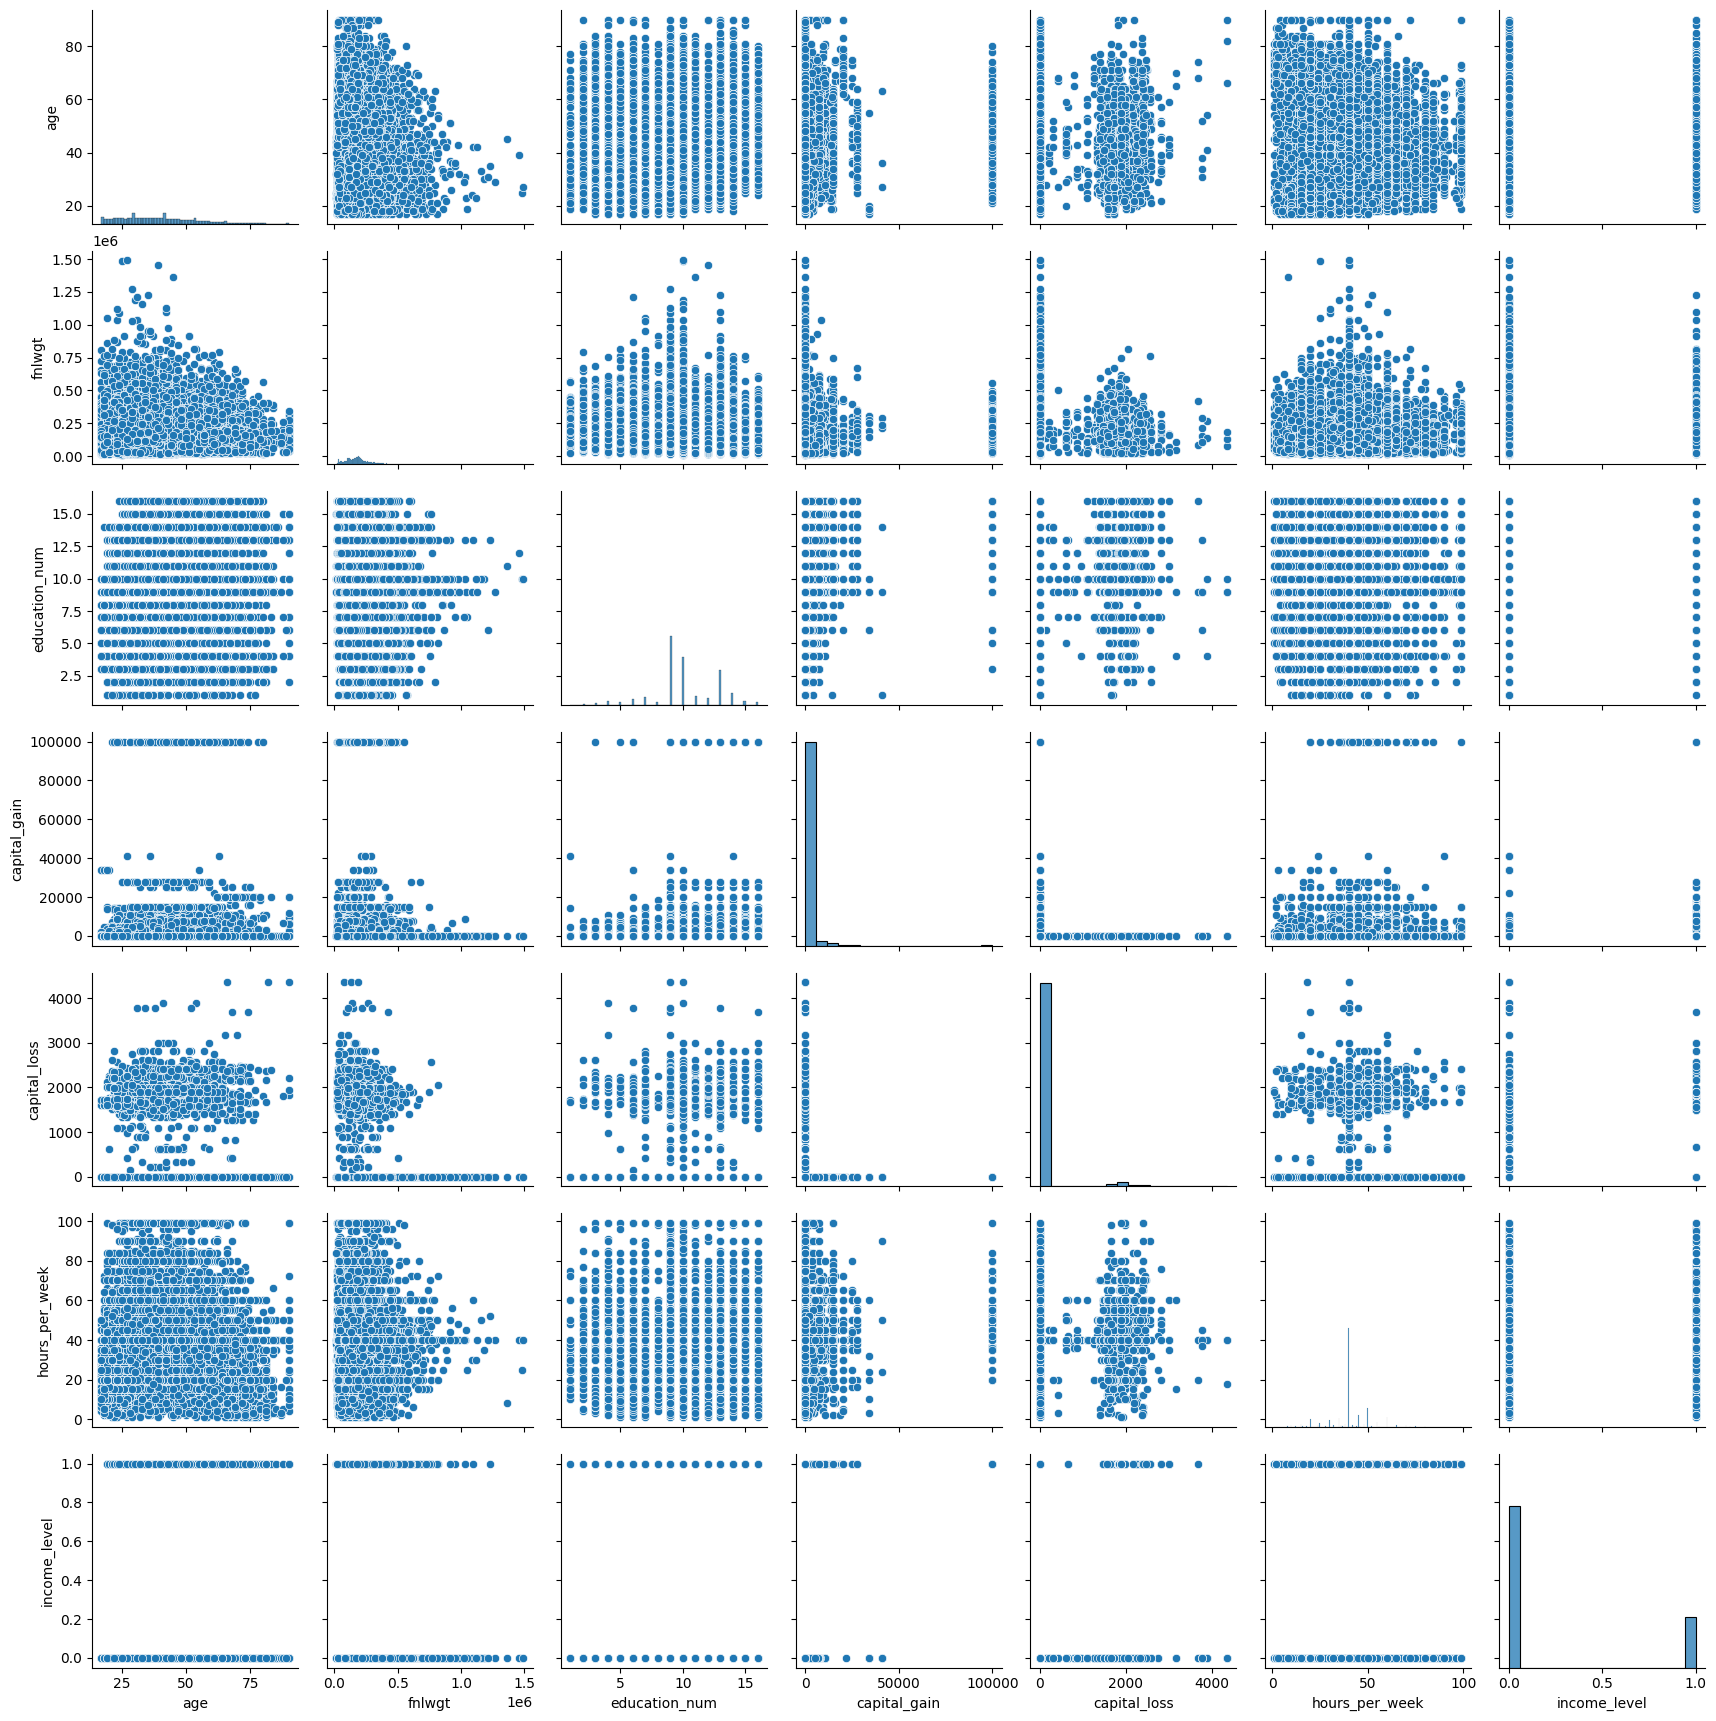

In [23]:
import seaborn as sns
sns.pairplot(data)

In [24]:
YY=data.iloc[:,6].values

In [25]:
YY

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(XX,YY,test_size=0.3,random_state=43)

In [34]:
models=[LogisticRegression(),GaussianNB(),RandomForestClassifier(),DecisionTreeClassifier(),SVC()]

In [35]:
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(model,accuracy_score(y_test,y_pred))

LogisticRegression() 0.8122568757251075
GaussianNB() 0.7969699037739713
RandomForestClassifier() 0.811574421620146
DecisionTreeClassifier() 0.7753361086466936
SVC() 0.8270661298027707


In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=1)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [39]:
y_pred=ada.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8394185491025729
